In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
audio_feature = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SWC/audio_feature.csv', sep=',')
audio_feature.drop('Unnamed: 0', axis = 1, inplace = True)
audio_feature.fillna('Instrumental', inplace = True)

In [4]:
music = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SWC/music.csv')
music = music.drop(['Unnamed: 0'], axis = 1)
music = music.dropna(axis = 0)
music = music.reset_index(drop = True)
music = music[['song_ids', 'song_titles', 'artist_names']]

In [5]:
musics = pd.merge(audio_feature, music)

In [6]:
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SWC/user.csv')
users = users.drop(['Unnamed: 0'], axis = 1)

In [7]:
bb = music[['song_ids']]
musicf = pd.merge(audio_feature, bb)
musicf.head()

,track_id,genre,MFCC_Overall_Standard_Deviation_1,MFCC_Overall_Standard_Deviation_2,MFCC_Overall_Standard_Deviation_3,MFCC_Overall_Standard_Deviation_4,MFCC_Overall_Standard_Deviation_5,MFCC_Overall_Standard_Deviation_6,MFCC_Overall_Standard_Deviation_7,MFCC_Overall_Standard_Deviation_8,...,MFCC_Overall_Average_7,MFCC_Overall_Average_8,MFCC_Overall_Average_9,MFCC_Overall_Average_10,MFCC_Overall_Average_11,MFCC_Overall_Average_12,MFCC_Overall_Average_13,song_tempo,song_beats,song_ids
0,TRBGRWH128F92E3551,Instrumental,41.34,6.602,4.394,3.117,2.598,2.161,2.109,1.743,...,-1.020,0.2135,0.4135,0.4853,0.3978,-0.1068,0.05735,159.900,[4.5480000e-02 4.2134000e-01 7.9627000e-01 1.1...,SOPXNHL12A58A79B0F
1,TRBGOAU128F4255BDA,Instrumental,37.37,3.649,2.215,1.939,1.750,1.773,1.624,1.633,...,-1.088,1.0540,-1.4490,1.8470,-0.7745,0.8185,-1.17800,130.229,[ 0.26699 0.78699 1.30832 1.83873 2.3...,SOMCFYL12A81C239F0
2,TRBGTNZ128F1481BBD,Latin,37.67,4.535,3.799,3.640,2.714,2.466,2.243,2.076,...,-2.455,1.8890,-1.3440,1.1770,-1.4300,0.9008,-1.18700,99.133,[ 0.37042 1.00942 1.64731 2.28047 2.8...,SOWICJC12A6D4F918D
3,TRBGTZD128EF34B6C3,Pop_Rock,39.07,6.672,4.034,3.349,2.685,2.350,2.292,1.844,...,-1.489,2.3540,-0.9823,1.6760,-0.9044,0.8931,-1.30800,66.246,[ 1.13474 2.04696 2.9543 3.86398 4.7...,SOTMVUQ12A6BD53721
4,TRBGFXC12903D01967,Pop_Rock,38.07,3.470,3.156,2.719,1.960,2.286,2.107,1.814,...,1.468,-0.3713,0.5434,0.2080,-1.2460,0.4104,0.06477,91.003,[ 0.35469 1.00634 1.65305 2.3113 2.9...,SOCVUYU12A67AE217D


## 오디오 기반 추천시스템 구축

In [14]:
x = []
for i in range(len(musicf)):
  a = musicf.loc[i][2:-2].to_list()
  x.append(a)
audio_x = np.array(x)

In [15]:
ugenre = musics['genre'].unique()
genre = {}
n = 0
for i in ugenre:
  genre[i] = n
  n += 1

In [16]:
musics.replace({'genre':genre}, inplace = True)
audio_y = musics['genre'].to_list()
audio_y = np.array(audio_y)

In [17]:
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras import initializers
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model
from keras.layers import *
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_x, audio_y, test_size=0.05, shuffle=True)
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y, num_classes=16)
n_classes = 16

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, kernel_initializer = initializers.he_normal(seed=1), activation="relu", input_shape = (27, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_initializer=initializers.he_normal(seed=1)))
model.add(Dense(n_classes, activation="softmax", kernel_initializer=initializers.he_normal(seed=1)))
plot_model(model, to_file="/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Model_Architecture2.jpg")
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])
model.summary()
pd.DataFrame(model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1).history).to_csv("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/training_history2.csv")
score = model.evaluate(test_x, test_y, verbose=1)
print(score)
model.save("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Model2.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 16)            128       
                                                                 
 flatten_1 (Flatten)         (None, 336)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                21568     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
Total params: 22,736
Trainable params: 22,736
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 1s 13ms/step - loss: 40.8691 - accuracy: 0.1057 - val_loss: 15.9897 - val_accuracy: 0.1560
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 13.2365 - accuracy: 0.3533 - val_loss: 12.2703 - val_accuracy: 0.3333
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 10.6597 - accuracy: 0.3486 - val_loss: 9.7521 - val_accuracy: 0.3333
Epoch 4/10
40/40 [==============================] - 0s 8ms/step - loss: 8.5019 - accuracy: 0.3691 - val_loss: 7.6996 - val_accuracy: 0.3191
Epoch 5/10
40/40 [==============================] - 0s 8ms/step - loss: 6.8632 - accuracy: 0.3620 - val_loss: 6.4826 - val_accuracy: 0.3404
Epoch 6/10
40/40 [==============================] - 0s 9ms/step - loss: 5.7921 - accuracy: 0.3856 - val_loss: 5.5912 - val_accuracy: 0.3121
Epoch 7/10
40/40 [==============================] - 0s 8ms/step - loss: 4.8493 - accuracy: 0.3943 - val_loss: 4.8754 - val_accuracy: 0.3617
Epoch 8/10
40/40 [=======

In [18]:
from keras.models import Model, load_model

# Load the trained model.
loaded_model = load_model("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Modeln.h5")
loaded_model.set_weights(loaded_model.get_weights())
# Discard the Softmax layer, Second last layer provides the latent feature representation.
matrix_size = loaded_model.layers[-2].output.shape[1]
new_model = Model(loaded_model.inputs, loaded_model.layers[-2].output)
print(new_model.summary())

images = audio_x
images = images.reshape(images.shape[0], images.shape[1], 1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4_input (InputLayer)  [(None, 27, 1)]          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 21, 16)            128       
                                                                 
 flatten_4 (Flatten)         (None, 336)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                21568     
                                                                 
Total params: 21,696
Trainable params: 21,696
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
predict = new_model.predict(images)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

audio_cosine = cosine_similarity(predict)

In [21]:
def audio_recommendations(index, rec_items):

    # 입력된 인덱스의 음악과 유사한 음악 선정.
    sim_scores = list(enumerate(audio_cosine[index]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:(rec_items+1)]

    # 가장 유사한 음악의 인덱스
    song_indices = [i[0] for i in sim_scores]

    return song_indices, sim_scores

In [22]:
def print_audio_recommend(index, rec_items, song_indices, sim_scores):
    title = musics.iloc[index]['song_titles']

    print(f'The {rec_items} recommended songs for {title} are:')
    for i in range(rec_items):
      print(f"Number {i+1}:")
      idx = song_indices[i]
      print(f"{musics.iloc[idx]['song_titles']} by {musics.iloc[idx]['artist_names']} with {(round(sim_scores[i][1], 4))} similarity score")
      print("----------------------------")

In [23]:
audio_indices, audio_sim_scores = audio_recommendations(0, 10)
print_audio_recommend(0, 10, audio_indices, audio_sim_scores)

The 10 recommended songs for Need are:
Number 1:
Find Another Way by Captain Hollywood Project with 0.9998000264167786 similarity score
----------------------------
Number 2:
Sent By Angels by Arc Angels with 0.9994000196456909 similarity score
----------------------------
Number 3:
Chasing Monsters by John Wesley with 0.9994000196456909 similarity score
----------------------------
Number 4:
Freedom by 4Him with 0.9994000196456909 similarity score
----------------------------
Number 5:
Esto Es Real by Baby Rasta & Gringo with 0.9993000030517578 similarity score
----------------------------
Number 6:
La Revolución by Memphis La Blusera with 0.9993000030517578 similarity score
----------------------------
Number 7:
You Saved My Life by Kieran with 0.9993000030517578 similarity score
----------------------------
Number 8:
Venite Pa' Maracaibo by Guaco with 0.9991000294685364 similarity score
----------------------------
Number 9:
Tides Of Time by Donna The Buffalo with 0.9990000128746033

In [24]:
def audio_recall(num):
  audio_count_list = []
  for i in range(len(musics)):
    rec_indices, rec_sim = audio_recommendations(i, num)
    rec = []
    for i in range(num):
      rec.append(musics.iloc[rec_indices[i]]['song_ids'])

    title = musics['song_ids'].iloc[i]
    title_user = users[users['song_ids'] == title]
    if len(title_user) != 0:
      max_user = title_user['play_count'].idxmax()
      max_user = title_user.loc[max_user]
      max_user_id = max_user['user_id']
      user_0 = users[users['user_id'] == max_user_id]
      user_0 = user_0.sort_values('play_count', ascending = False)
      user_list = list(user_0['song_ids'][:num])
      count = 0
      for i in rec:
        for j in user_list:
          if i == j:
            count += 1
    else:
      count = 0
    audio_count_list.append(count)

  return sum(audio_count_list)/len(musics)

In [ ]:
audio_recall10 = audio_recall(10)
print(audio_recall10)

0.00202020202020202


In [ ]:
audio_recall50 = audio_recall(50)
print(audio_recall50)

0.13198653198653199


In [ ]:
audio_dcg_list = []
audio_idcg_list = []
for i in range(len(musics)):
  rec_indices, rec_sim = audio_recommendations(i, 100)
  rec = []
  for i in range(100):
    rec.append(musics.iloc[rec_indices[i]]['song_ids'])

  title = musics['song_ids'].iloc[i]
  title_user = users[users['song_ids'] == title]
  if len(title_user) != 0:
    max_user = title_user['play_count'].idxmax()
    max_user = title_user.loc[max_user]
    max_user_id = max_user['user_id']
    user_0 = users[users['user_id'] == max_user_id]
    relevant = []
    for j in range(len(user_0)):
      play = user_0.iloc[j]['play_count']
      if play >= 2 and play <= 5:
        relevant.append(2)
      elif play > 5:
        relevant.append(3)
      elif play < 2:
        relevant.append(1)
    user_0['relevant'] = relevant
    user_0 = user_0.sort_values('play_count', ascending = False)
    user_0 = user_0.reset_index(drop = True)
    user_list = list(user_0['song_ids'])
    dcg_ = 0
    idcg_ = 0
    for k in range(len(user_0)):
      for i in rec:
        for j in user_list:
          if i == j:
            idx = user_0[user_0['song_ids'] == j].index[0]
            dcg_ += (user_0.iloc[idx]['relevant']/np.log2(k+2))
      if k < 100:
        idcg_ += (user_0.iloc[k]['relevant']/np.log2(k+2))
  audio_dcg_list.append(dcg_)
  audio_idcg_list.append(idcg_)

audio_dcg = sum(audio_dcg_list)/len(musics)
audio_idcg = sum(audio_idcg_list)/len(musics)
ndcg_audio = audio_dcg/audio_idcg
print(ndcg_audio)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.06333614005784688


## parameter 변경

In [25]:
# filter = 16, kernel = 4
train_x, test_x, train_y, test_y = train_test_split(audio_x, audio_y, test_size=0.05, shuffle=True)
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y, num_classes=16)
n_classes = 16

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=4, kernel_initializer = initializers.he_normal(seed=1), activation="relu", input_shape = (27, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_initializer=initializers.he_normal(seed=1)))
model.add(Dense(n_classes, activation="softmax", kernel_initializer=initializers.he_normal(seed=1)))
plot_model(model, to_file="/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Model_Architecture12.jpg")
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])
model.summary()
pd.DataFrame(model.fit(train_x, train_y, epochs=15, verbose=1, validation_split=0.1).history).to_csv("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/training_history12.csv")
score = model.evaluate(test_x, test_y, verbose=1)
print(score)
model.save("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Modeln2.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 16)            80        
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                24640     
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
Total params: 25,760
Trainable params: 25,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 1s 13ms/step - loss: 29.9242 - accuracy: 0.1680 - val_loss: 12.1135 - val_accuracy: 0.3759
Epoch 2/15
40/40 [==============================] - 0s 8ms/step - loss: 11.7242 - accuracy: 0.3628 - val_loss: 9.0964 - val_accuracy: 0.4255
Epoch 3/15
40/40 [==============================] - 0s 9ms/step - loss: 9.1117 - accuracy: 0.4062 - val_loss: 7.0468 - val_accuracy: 0.4539
Epoch 4/15
40/40 [==============================] - 0s 9ms/step - loss: 7.1522 - accuracy: 0.4140 - val_loss: 5.9261 - val_accuracy: 0.3972
Epoch 5/15
40/40 [==============================] - 0s 9ms/step - loss: 5.9240 - accuracy: 0.4030 - val_loss: 4.8906 - val_accuracy: 0.4043
Epoch 6/15
40/40 [==============================] - 0s 8ms/step - loss: 5.1654 - accuracy: 0.4235 - val_loss: 4.5182 - val_accuracy: 0.3688
Epoch 7/15
40/40 [==============================] - 0s 7ms/step - loss: 4.6442 - accuracy: 0.4314 - val_loss: 3.8689 - val_accuracy: 0.4184
Epoch 8/15
40/40 [=========

In [26]:
# Load the trained model.
loaded_model2 = load_model("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Modeln2.h5")
loaded_model2.set_weights(loaded_model2.get_weights())
# Discard the Softmax layer, Second last layer provides the latent feature representation.
new_model2 = Model(loaded_model2.inputs, loaded_model2.layers[-2].output)
print(new_model2.summary())

images = audio_x
images = images.reshape(images.shape[0], images.shape[1], 1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2_input (InputLayer)  [(None, 27, 1)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 16)            80        
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                24640     
                                                                 
Total params: 24,720
Trainable params: 24,720
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
predict2 = new_model2.predict(images)

In [28]:
audio_cosine2 = cosine_similarity(predict2)

In [29]:
def audio_recommendations(index, rec_items):

    # 입력된 인덱스의 음악과 유사한 음악 선정.
    sim_scores = list(enumerate(audio_cosine2[index]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:(rec_items+1)]

    # 가장 유사한 음악의 인덱스
    song_indices = [i[0] for i in sim_scores]

    return song_indices, sim_scores

In [30]:
audio_indices2, audio_sim_scores2 = audio_recommendations(0, 10)
print_audio_recommend(0, 10, audio_indices2, audio_sim_scores2)

The 10 recommended songs for Need are:
Number 1:
Chasing Monsters by John Wesley with 0.9995999932289124 similarity score
----------------------------
Number 2:
La Revolución by Memphis La Blusera with 0.9994999766349792 similarity score
----------------------------
Number 3:
You Saved My Life by Kieran with 0.9994999766349792 similarity score
----------------------------
Number 4:
Guns And The Young by Mighty Mighty Bosstones with 0.9993000030517578 similarity score
----------------------------
Number 5:
Sent By Angels by Arc Angels with 0.9993000030517578 similarity score
----------------------------
Number 6:
Find Another Way by Captain Hollywood Project with 0.9993000030517578 similarity score
----------------------------
Number 7:
Freedom by 4Him with 0.9991999864578247 similarity score
----------------------------
Number 8:
Venite Pa' Maracaibo by Guaco with 0.9991999864578247 similarity score
----------------------------
Number 9:
On The Road Again by The Sonics with 0.999100029

In [ ]:
audio2_recall10 = audio_recall(10)
print(audio2_recall10)

0.0047138047138047135


In [ ]:
audio2_recall50 = audio_recall(50)
print(audio2_recall50)

0.10437710437710437


In [ ]:
audio_dcg_list2 = []
audio_idcg_list2 = []
for i in range(len(musics)):
  rec_indices, rec_sim = audio_recommendations(i, 100)
  rec = []
  for i in range(100):
    rec.append(musics.iloc[rec_indices[i]]['song_ids'])

  title = musics['song_ids'].iloc[i]
  title_user = users[users['song_ids'] == title]
  if len(title_user) != 0:
    max_user = title_user['play_count'].idxmax()
    max_user = title_user.loc[max_user]
    max_user_id = max_user['user_id']
    user_0 = users[users['user_id'] == max_user_id]
    relevant = []
    for j in range(len(user_0)):
      play = user_0.iloc[j]['play_count']
      if play >= 2 and play <= 5:
        relevant.append(2)
      elif play > 5:
        relevant.append(3)
      elif play < 2:
        relevant.append(1)
    user_0['relevant'] = relevant
    user_0 = user_0.sort_values('play_count', ascending = False)
    user_0 = user_0.reset_index(drop = True)
    user_list = list(user_0['song_ids'])
    dcg_ = 0
    idcg_ = 0
    for k in range(len(user_0)):
      for i in rec:
        for j in user_list:
          if i == j:
            idx = user_0[user_0['song_ids'] == j].index[0]
            dcg_ += (user_0.iloc[idx]['relevant']/np.log2(k+2))
      if k < 100:
        idcg_ += (user_0.iloc[k]['relevant']/np.log2(k+2))
  audio_dcg_list2.append(dcg_)
  audio_idcg_list2.append(idcg_)

audio_dcg2 = sum(audio_dcg_list2)/len(musics)
audio_idcg2 = sum(audio_idcg_list2)/len(musics)
ndcg_audio2 = audio_dcg2/audio_idcg2
print(ndcg_audio2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.06437443743584437


In [31]:
# filter = 32, kernel = 4
train_x, test_x, train_y, test_y = train_test_split(audio_x, audio_y, test_size=0.05, shuffle=True)
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y, num_classes=16)
n_classes = 16

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, kernel_initializer = initializers.he_normal(seed=1), activation="relu", input_shape = (27, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_initializer=initializers.he_normal(seed=1)))
model.add(Dense(n_classes, activation="softmax", kernel_initializer=initializers.he_normal(seed=1)))
plot_model(model, to_file="/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Model_Architecture12.jpg")
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])
model.summary()
pd.DataFrame(model.fit(train_x, train_y, epochs=15, verbose=1, validation_split=0.1).history).to_csv("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/training_history12.csv")
score = model.evaluate(test_x, test_y, verbose=1)
print(score)
model.save("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Modeln4.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 24, 32)            160       
                                                                 
 flatten_3 (Flatten)         (None, 768)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                49216     
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
Total params: 50,416
Trainable params: 50,416
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 1s 13ms/step - loss: 37.1114 - accuracy: 0.2350 - val_loss: 11.2123 - val_accuracy: 0.3475
Epoch 2/15
40/40 [==============================] - 0s 9ms/step - loss: 9.2738 - accuracy: 0.3226 - val_loss: 5.8405 - val_accuracy: 0.2624
Epoch 3/15
40/40 [==============================] - 0s 9ms/step - loss: 4.5294 - accuracy: 0.3778 - val_loss: 2.5856 - val_accuracy: 0.4184
Epoch 4/15
40/40 [==============================] - 0s 10ms/step - loss: 2.9817 - accuracy: 0.4495 - val_loss: 2.3684 - val_accuracy: 0.5319
Epoch 5/15
40/40 [==============================] - 0s 8ms/step - loss: 2.8669 - accuracy: 0.4448 - val_loss: 2.1982 - val_accuracy: 0.4894
Epoch 6/15
40/40 [==============================] - 0s 7ms/step - loss: 2.5437 - accuracy: 0.4464 - val_loss: 2.2682 - val_accuracy: 0.4539
Epoch 7/15
40/40 [==============================] - 0s 7ms/step - loss: 2.4206 - accuracy: 0.4448 - val_loss: 2.0312 - val_accuracy: 0.4894
Epoch 8/15
40/40 [=========

In [32]:
# Load the trained model.
loaded_model3 = load_model("/content/drive/MyDrive/Colab Notebooks/SWC/Saved_Model/Modeln4.h5")
loaded_model3.set_weights(loaded_model3.get_weights())
# Discard the Softmax layer, Second last layer provides the latent feature representation.
new_model3 = Model(loaded_model3.inputs, loaded_model3.layers[-2].output)
print(new_model3.summary())

images = audio_x
images = images.reshape(images.shape[0], images.shape[1], 1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3_input (InputLayer)  [(None, 27, 1)]          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 24, 32)            160       
                                                                 
 flatten_3 (Flatten)         (None, 768)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                49216     
                                                                 
Total params: 49,376
Trainable params: 49,376
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
predict3 = new_model3.predict(images)

In [34]:
audio_cosine3 = cosine_similarity(predict3)

In [35]:
def audio_recommendations(index, rec_items):

    # 입력된 인덱스의 음악과 유사한 음악 선정.
    sim_scores = list(enumerate(audio_cosine3[index]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:(rec_items+1)]

    # 가장 유사한 음악의 인덱스
    song_indices = [i[0] for i in sim_scores]

    return song_indices, sim_scores

In [36]:
audio_indices3, audio_sim_scores3 = audio_recommendations(0, 10)
print_audio_recommend(0, 10, audio_indices3, audio_sim_scores3)

The 10 recommended songs for Need are:
Number 1:
Caught In A Dream by Tesla with 0.9994999766349792 similarity score
----------------------------
Number 2:
Sent By Angels by Arc Angels with 0.9994999766349792 similarity score
----------------------------
Number 3:
Find Another Way by Captain Hollywood Project with 0.9994999766349792 similarity score
----------------------------
Number 4:
Freedom by 4Him with 0.9994999766349792 similarity score
----------------------------
Number 5:
Chasing Monsters by John Wesley with 0.9994000196456909 similarity score
----------------------------
Number 6:
Esto Es Real by Baby Rasta & Gringo with 0.9993000030517578 similarity score
----------------------------
Number 7:
Guns And The Young by Mighty Mighty Bosstones with 0.9993000030517578 similarity score
----------------------------
Number 8:
No Hay Manera by El Gran Combo De Puerto Rico with 0.9993000030517578 similarity score
----------------------------
Number 9:
On The Road Again by The Sonics w

In [ ]:
audio3_recall10 = audio_recall(10)
print(audio3_recall10)

0.00404040404040404


In [ ]:
audio3_recall50 = audio_recall(50)
print(audio3_recall50)

0.11245791245791245


In [ ]:
audio_dcg_list3 = []
audio_idcg_list3 = []
for i in range(len(musics)):
  rec_indices, rec_sim = audio_recommendations(i, 100)
  rec = []
  for i in range(100):
    rec.append(musics.iloc[rec_indices[i]]['song_ids'])

  title = musics['song_ids'].iloc[i]
  title_user = users[users['song_ids'] == title]
  if len(title_user) != 0:
    max_user = title_user['play_count'].idxmax()
    max_user = title_user.loc[max_user]
    max_user_id = max_user['user_id']
    user_0 = users[users['user_id'] == max_user_id]
    relevant = []
    for j in range(len(user_0)):
      play = user_0.iloc[j]['play_count']
      if play >= 2 and play <= 5:
        relevant.append(2)
      elif play > 5:
        relevant.append(3)
      elif play < 2:
        relevant.append(1)
    user_0['relevant'] = relevant
    user_0 = user_0.sort_values('play_count', ascending = False)
    user_0 = user_0.reset_index(drop = True)
    user_list = list(user_0['song_ids'])
    dcg_ = 0
    idcg_ = 0
    for k in range(len(user_0)):
      for i in rec:
        for j in user_list:
          if i == j:
            idx = user_0[user_0['song_ids'] == j].index[0]
            dcg_ += (user_0.iloc[idx]['relevant']/np.log2(k+2))
      if k < 100:
        idcg_ += (user_0.iloc[k]['relevant']/np.log2(k+2))
  audio_dcg_list3.append(dcg_)
  audio_idcg_list3.append(idcg_)

audio_dcg3 = sum(audio_dcg_list3)/len(musics)
audio_idcg3 = sum(audio_idcg_list3)/len(musics)
ndcg_audio3 = audio_dcg3/audio_idcg3
print(ndcg_audio3)

0.07891060072780923


In [ ]:
import seaborn as sns

data = {'recall@10' : [audio_recall10, audio2_recall10, audio3_recall10],
        'recall@50' : [audio_recall50, audio2_recall50, audio3_recall50],
        'nDCG_100' : [ndcg_audio, ndcg_audio2, ndcg_audio3]}

result = pd.DataFrame(data)
result.index = ['fil16+ker7', 'fil16+ker4', 'fil32+ker4']

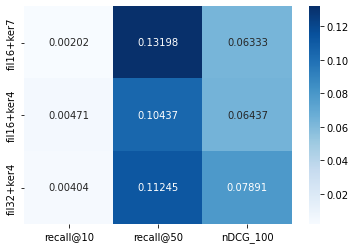

In [ ]:
re_heat = sns.heatmap(result, annot = True, fmt = '.5f', cmap = 'Blues')